Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

Populate file

In [2]:
MAPV_PATH = './threeROI_PURE/avg_pixel_value'
npy_files = glob(os.path.join(MAPV_PATH, '*.npy'))
npy_files.sort()
print(f"First 5 files: {npy_files[:5]}")

First 5 files: ['./threeROI_PURE/avg_pixel_value/01-01.npy', './threeROI_PURE/avg_pixel_value/01-02.npy', './threeROI_PURE/avg_pixel_value/01-03.npy', './threeROI_PURE/avg_pixel_value/01-04.npy', './threeROI_PURE/avg_pixel_value/01-05.npy']


Reshape

In [3]:
sel_idx = 0
npy_data = np.load(npy_files[sel_idx])
print(f"Shape of npy_data: {npy_data.shape}")

# reshape to (1,2,0)
npy_data = np.transpose(npy_data, (1, 2, 0))
print(f"Shape of npy_data: {npy_data.shape}")

Shape of npy_data: (2026, 3, 3)
Shape of npy_data: (3, 3, 2026)


Preview: Channel Wise

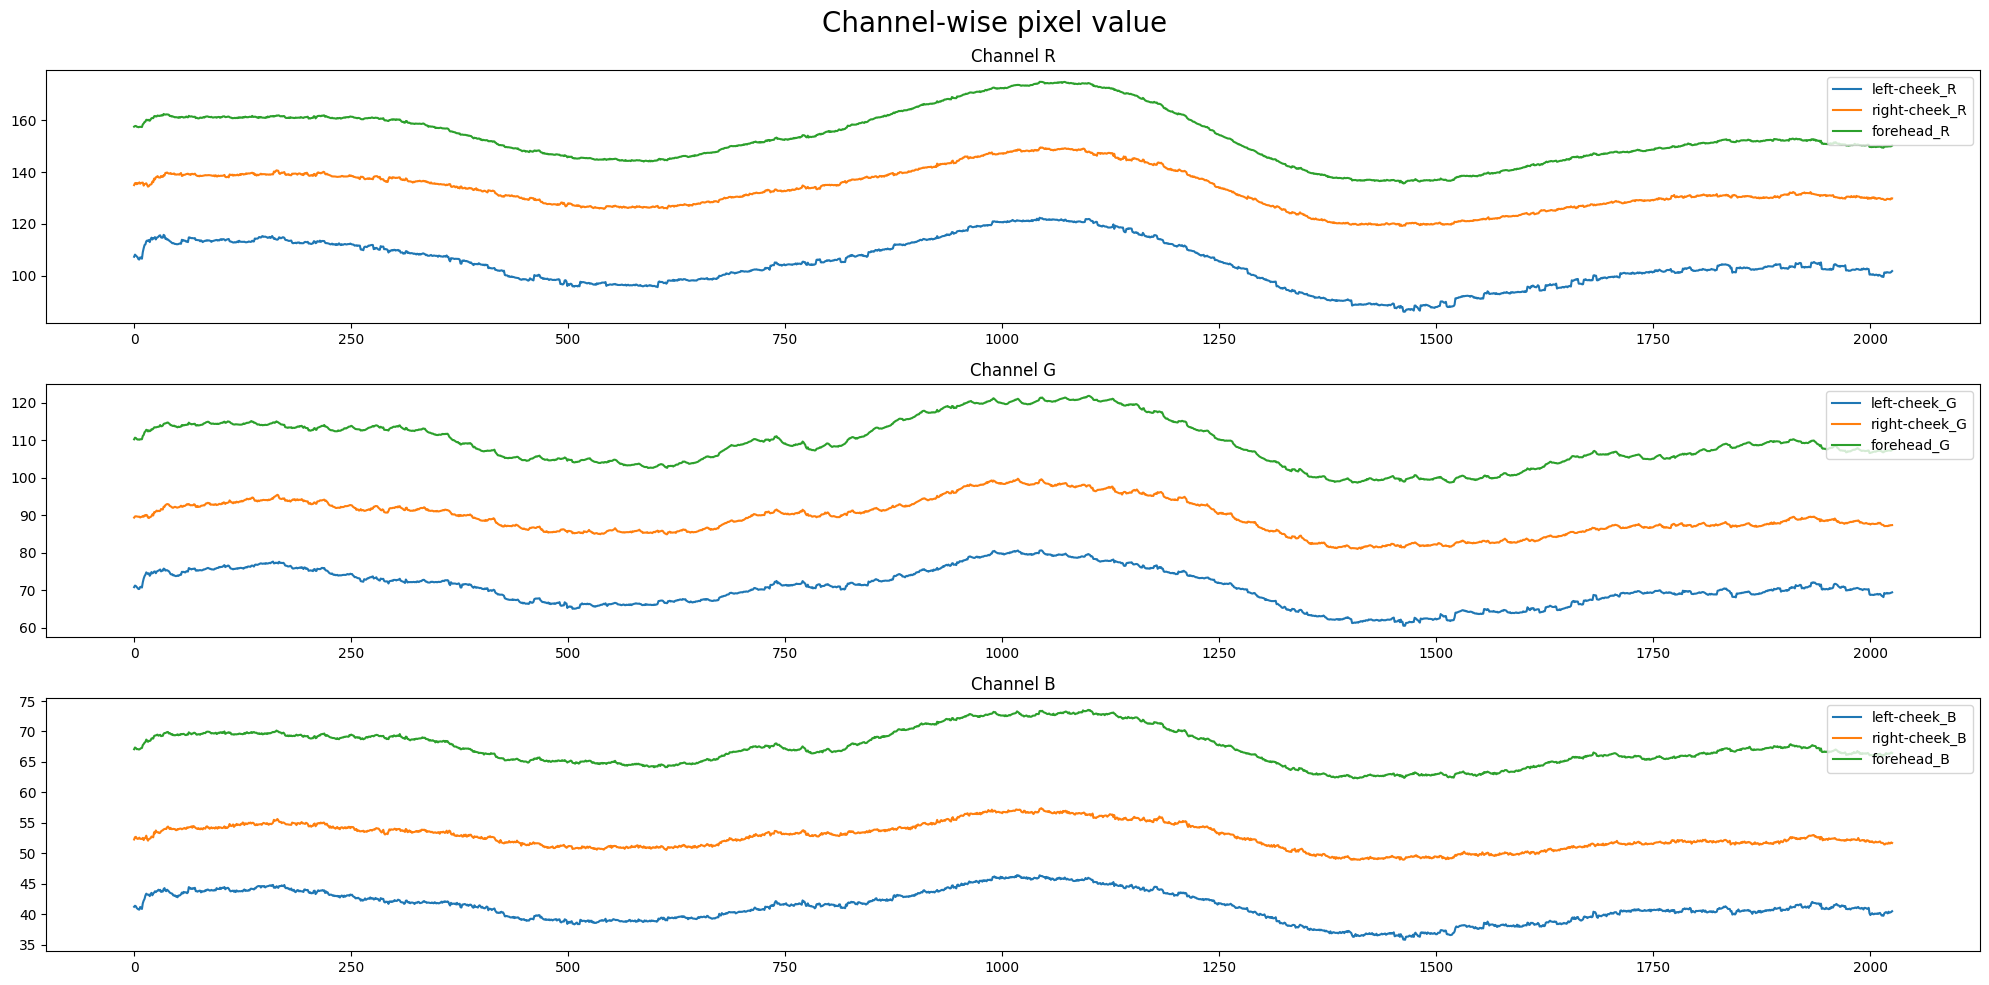

<Figure size 640x480 with 0 Axes>

In [4]:
label = ['left-cheek', 'right-cheek', 'forehead']
channels = ['R', 'G', 'B']

plt.figure(figsize=(20, 10))
plt.suptitle(f"Channel-wise pixel value",  fontsize=20)
for i in range(npy_data.shape[1]):
    plt.subplot(3, 1, i+1)
    plt.title(f"Channel {channels[i]}")
    for j in range(npy_data.shape[0]):
        plt.plot(npy_data[j, i], label=f'{label[j]}_{channels[i]}')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig('./out/channel_wise_pixel_value.png')

Preview: ROI Wise

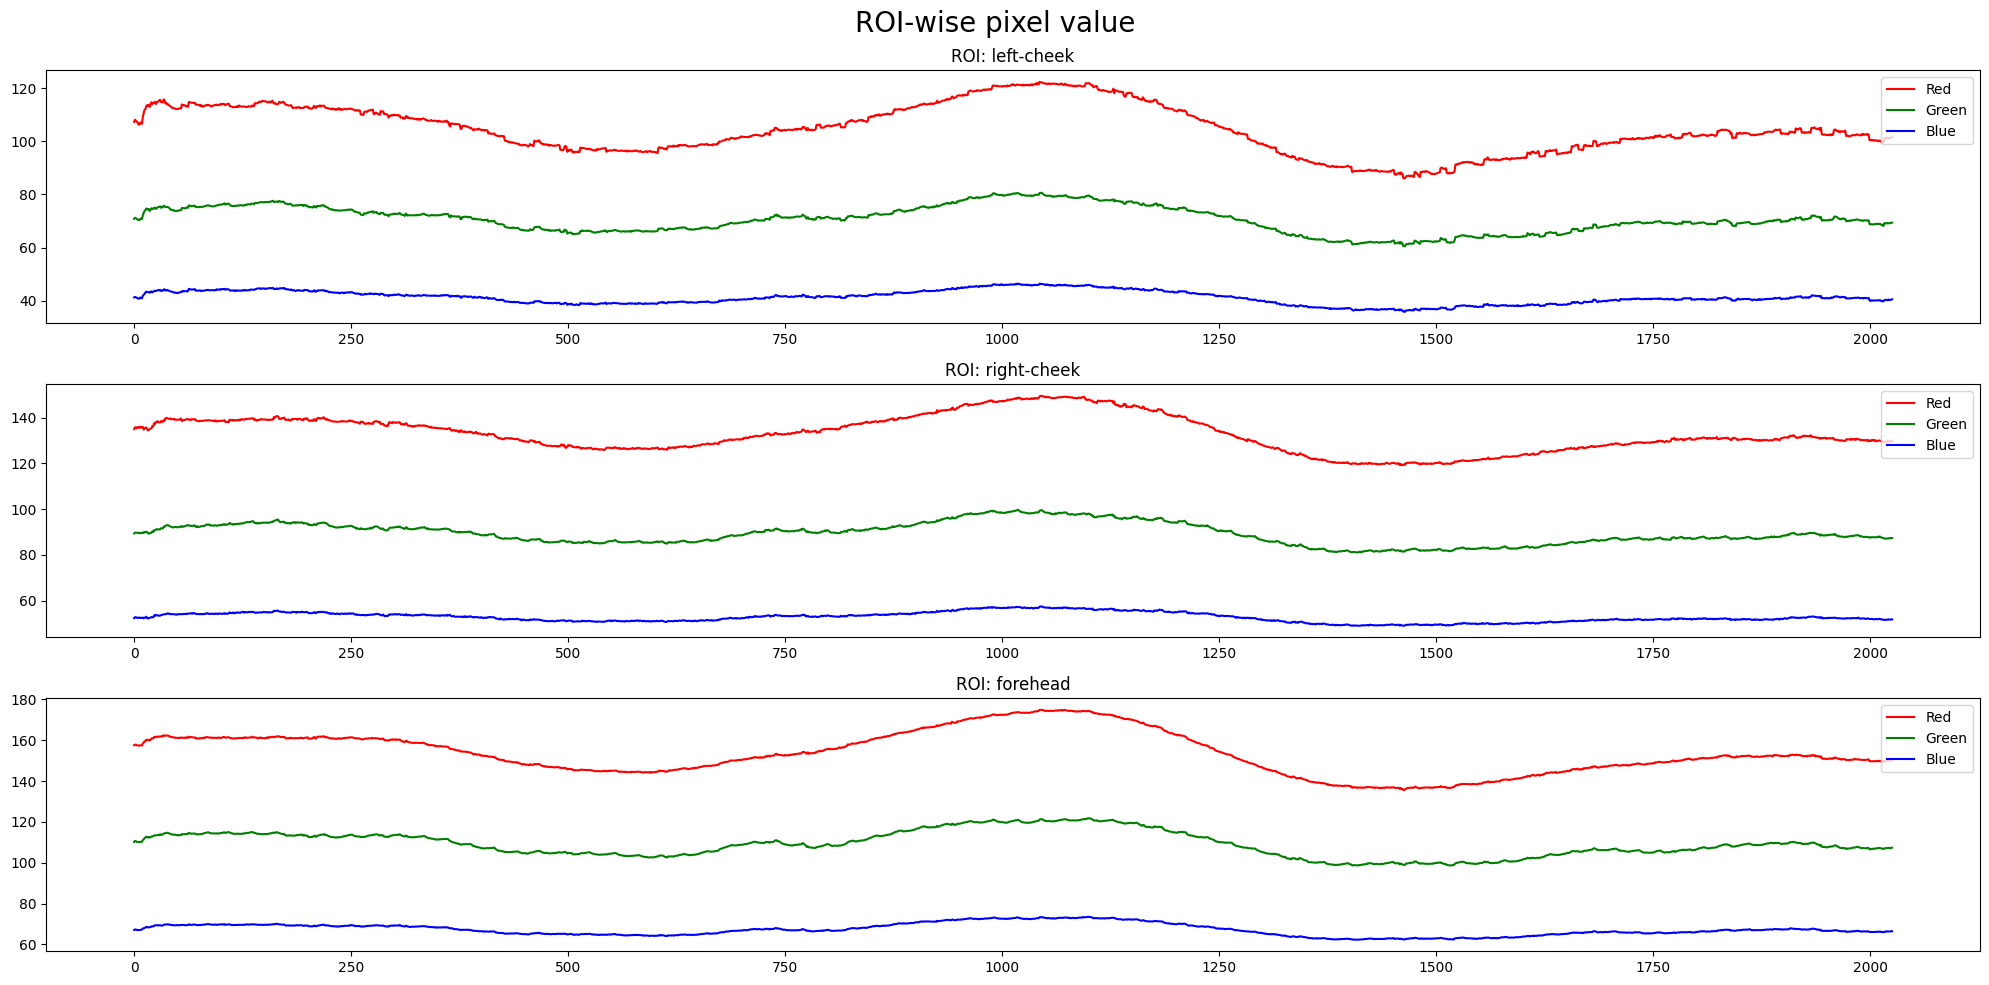

<Figure size 640x480 with 0 Axes>

In [5]:
label = ['left-cheek', 'right-cheek', 'forehead']
channels = ['R', 'G', 'B']

plt.figure(figsize=(20, 10))
plt.suptitle(f"ROI-wise pixel value",  fontsize=20)
for i in range(npy_data.shape[0]):
    plt.subplot(3, 1, i+1)
    plt.title(f"ROI: {label[i]}")
    plt.plot(npy_data[i, 0], label=f'Red', color='red')
    plt.plot(npy_data[i, 1], label=f'Green', color='green')
    plt.plot(npy_data[i, 2], label=f'Blue', color='blue')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig('./out/roi_wise_pixel_value.png')

Bandpass the mean pixel value

In [6]:
from chrom import bandpass_filter

In [7]:
npy_data = bandpass_filter(npy_data, fs=30, lowcut=0.5, highcut=3)

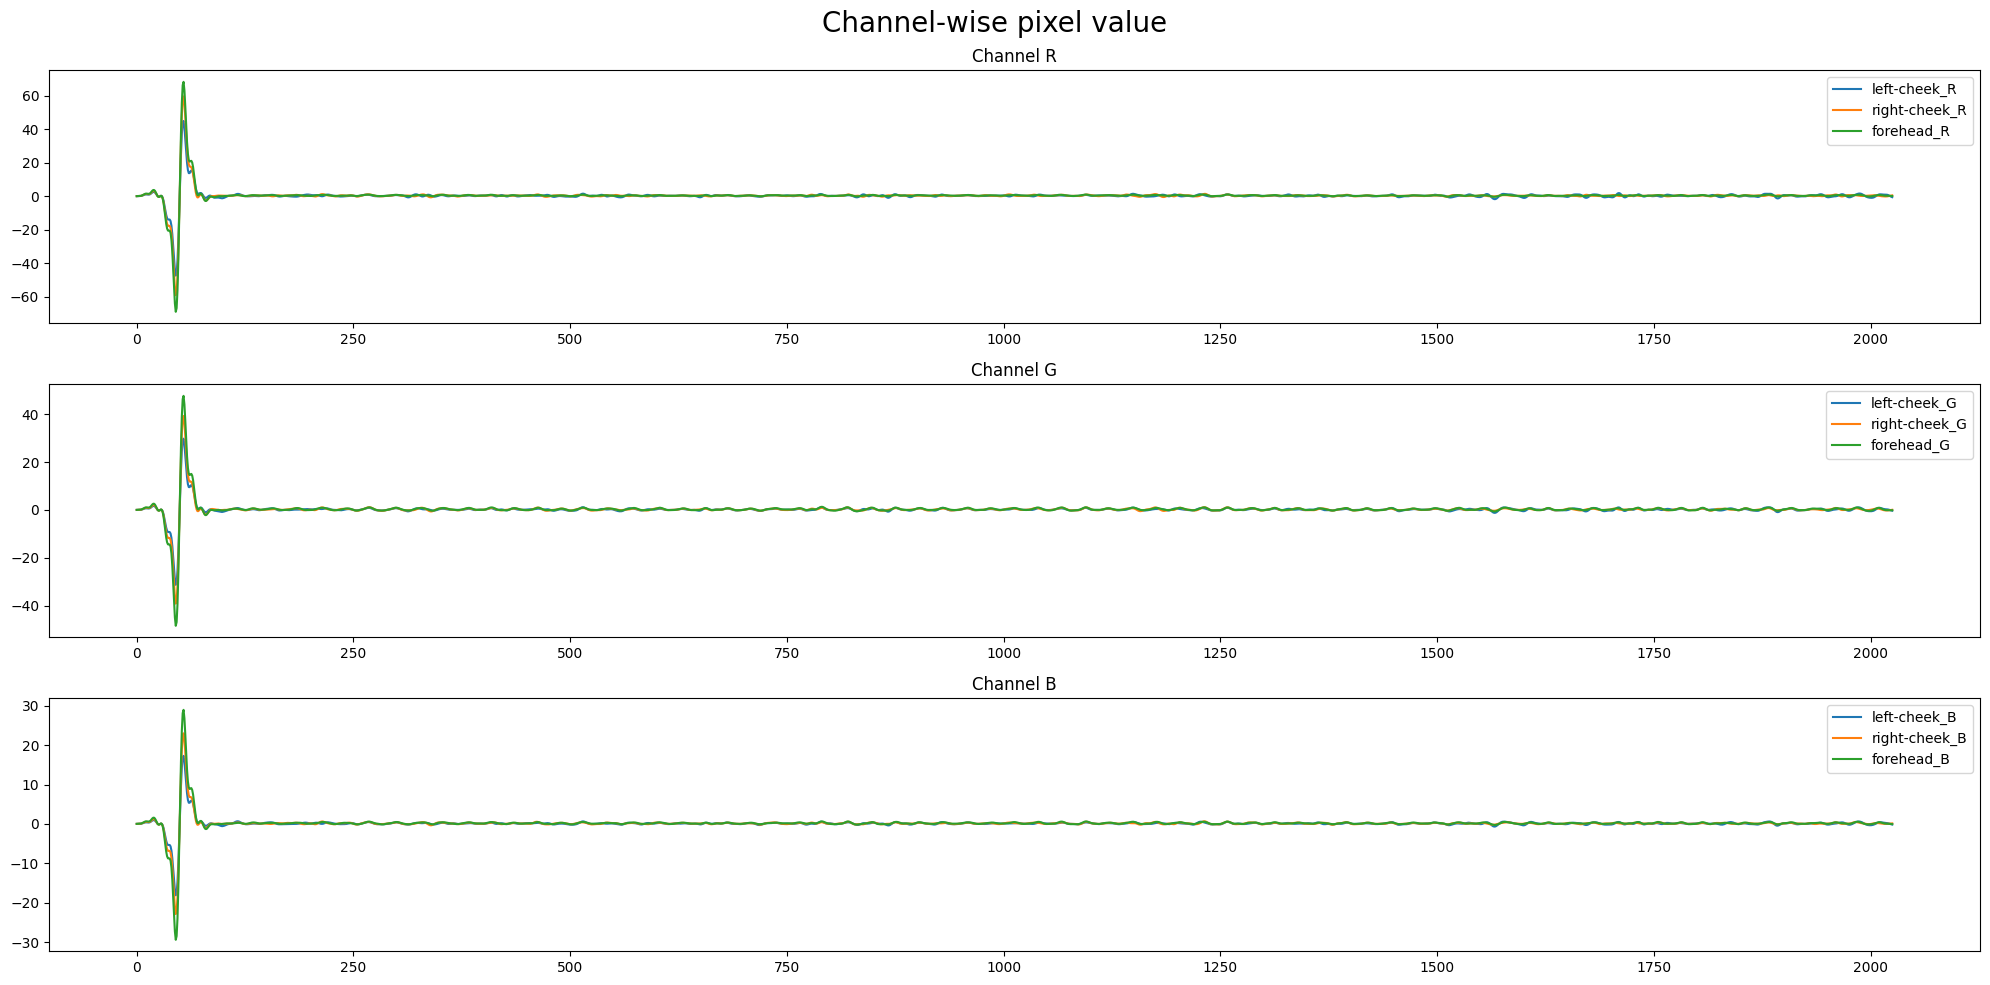

<Figure size 640x480 with 0 Axes>

In [8]:
label = ['left-cheek', 'right-cheek', 'forehead']
channels = ['R', 'G', 'B']

plt.figure(figsize=(20, 10))
plt.suptitle(f"Channel-wise pixel value",  fontsize=20)
for i in range(npy_data.shape[1]):
    plt.subplot(3, 1, i+1)
    plt.title(f"Channel {channels[i]}")
    for j in range(npy_data.shape[0]):
        plt.plot(npy_data[j, i], label=f'{label[j]}_{channels[i]}')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig('./out/channel_wise_pixel_value_filtered.png')

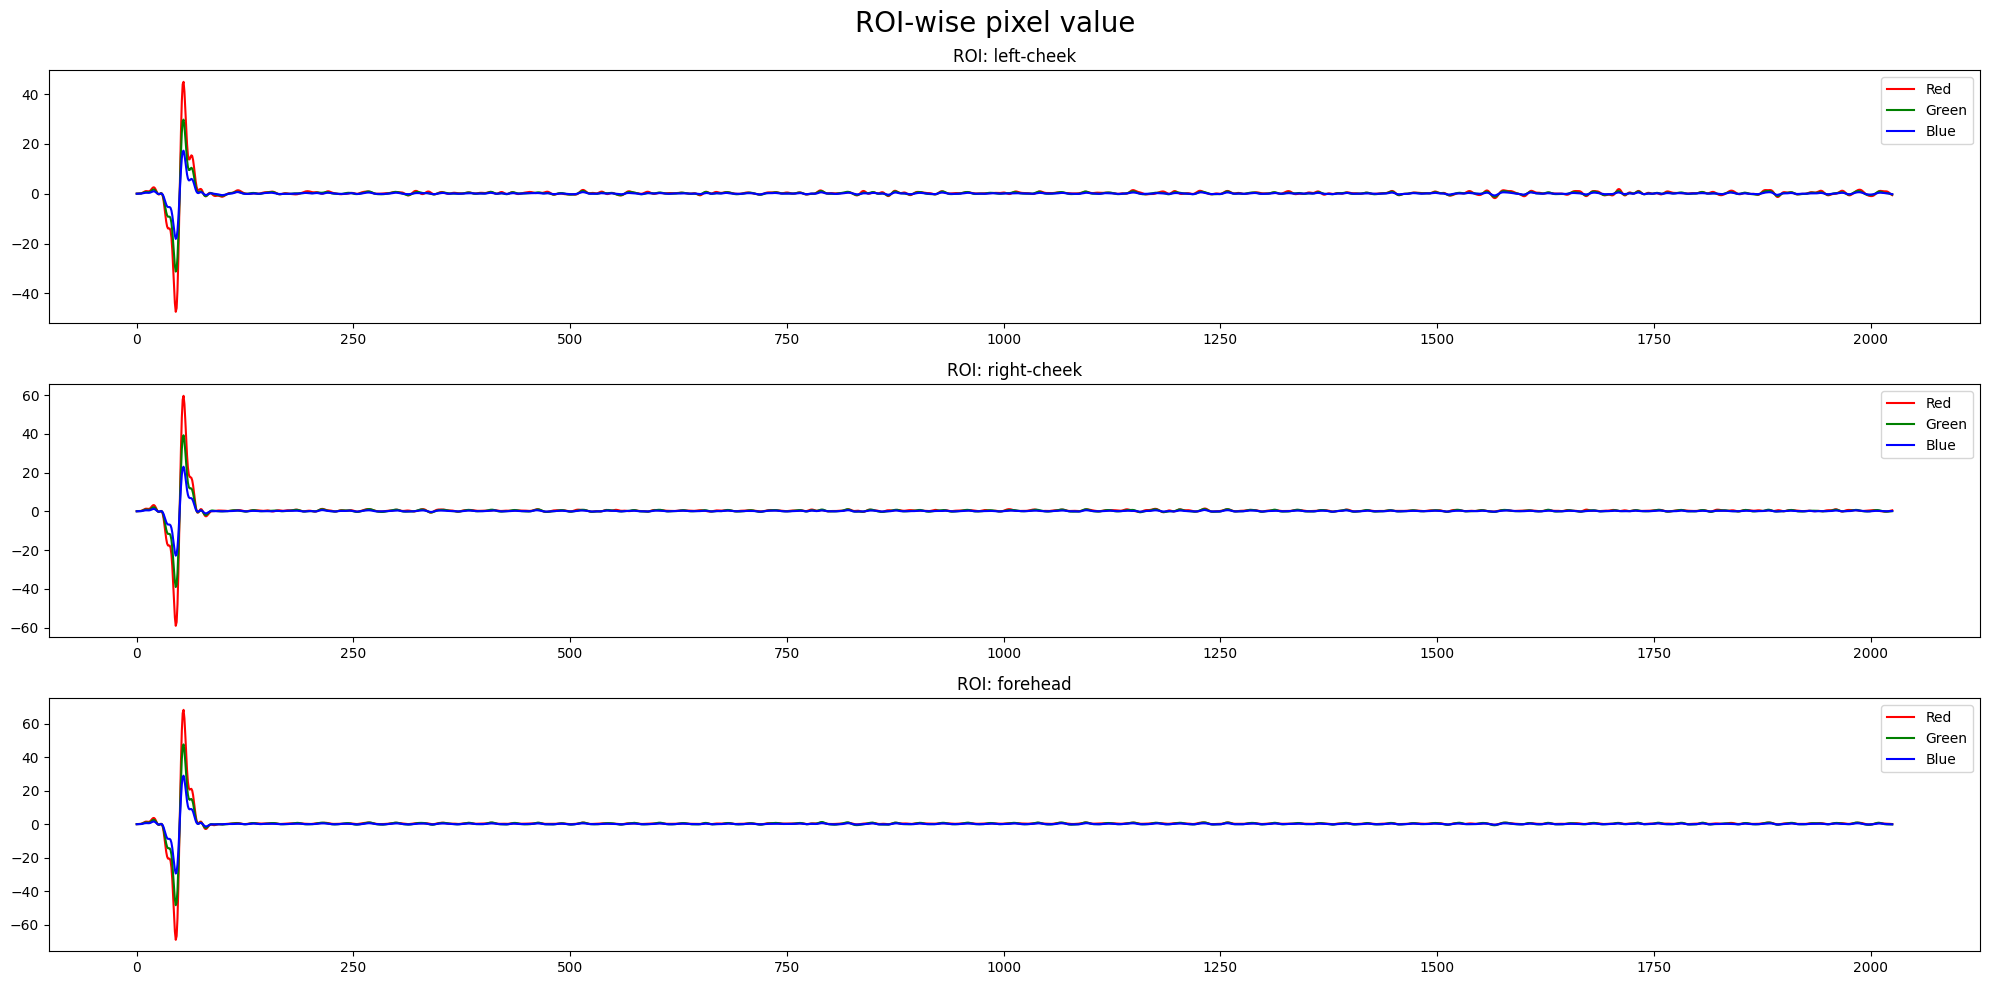

<Figure size 640x480 with 0 Axes>

In [9]:
label = ['left-cheek', 'right-cheek', 'forehead']
channels = ['R', 'G', 'B']

plt.figure(figsize=(20, 10))
plt.suptitle(f"ROI-wise pixel value",  fontsize=20)
for i in range(npy_data.shape[0]):
    plt.subplot(3, 1, i+1)
    plt.title(f"ROI: {label[i]}")
    plt.plot(npy_data[i, 0], label=f'Red', color='red')
    plt.plot(npy_data[i, 1], label=f'Green', color='green')
    plt.plot(npy_data[i, 2], label=f'Blue', color='blue')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig('./out/roi_wise_pixel_value_filtered.png')

Calculate rPPG from three different ROI

In [10]:
from chrom import chrom_rppg

In [11]:
fs = 30
bpass = [0.1, 3.0]
left_cheek_rppg = chrom_rppg(npy_data[0], fs, bpass)
right_cheek_rppg = chrom_rppg(npy_data[1], fs, bpass)
forehead_rppg = chrom_rppg(npy_data[2], fs, bpass)

Compare rPPG from those three ROI

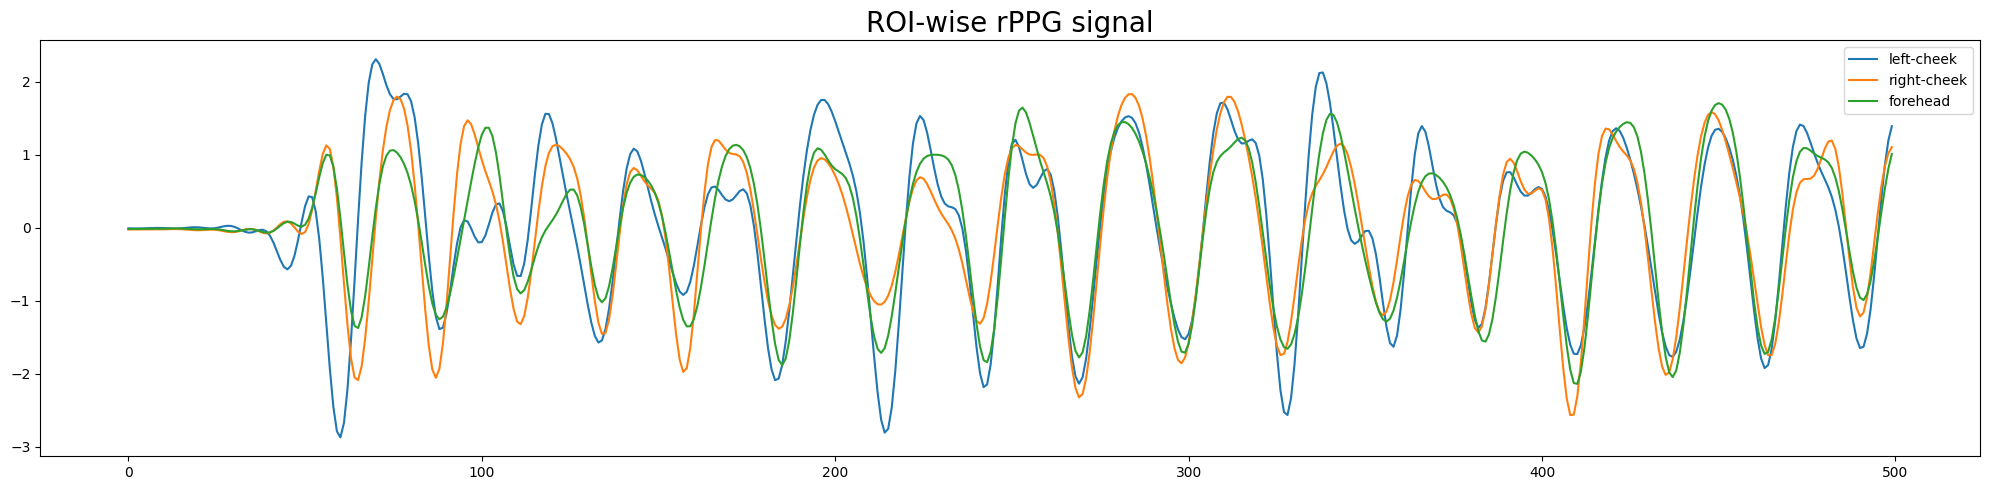

<Figure size 640x480 with 0 Axes>

In [12]:
start_end_idx = [0, 500]

plt.figure(figsize=(20, 5))
plt.title(f"ROI-wise rPPG signal",  fontsize=20)
plt.plot(left_cheek_rppg[start_end_idx[0]:start_end_idx[1]], label='left-cheek')
plt.plot(right_cheek_rppg[start_end_idx[0]:start_end_idx[1]], label='right-cheek')
plt.plot(forehead_rppg[start_end_idx[0]:start_end_idx[1]], label='forehead')
plt.legend(loc='upper right'); plt.tight_layout(); plt.show()
plt.savefig('./out/roi_wise_rppg.png')

Choose the most informative signals

In [13]:
from chrom import select_most_informative_signal

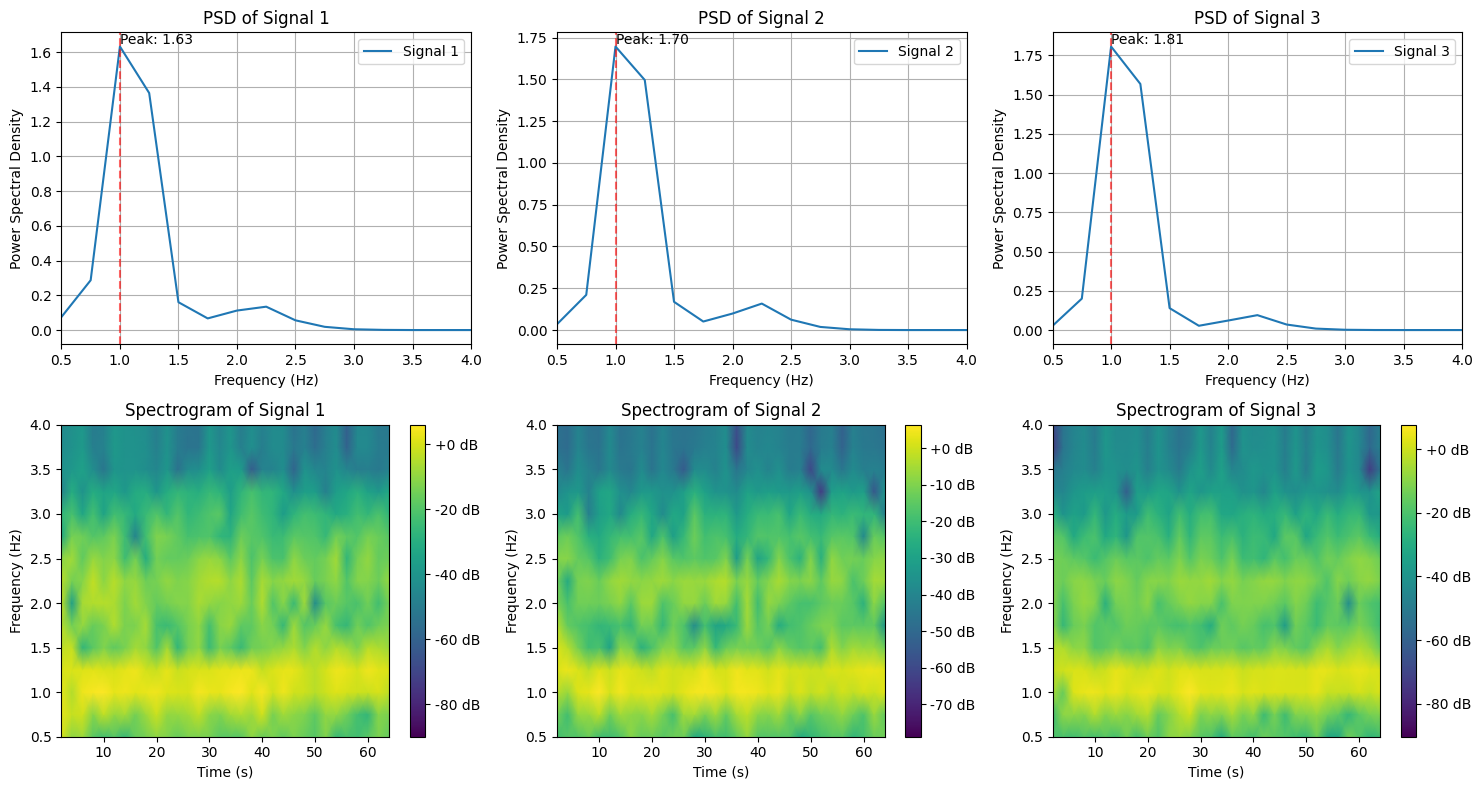

Selected signal: 2


In [14]:
rppg_sign = np.array([left_cheek_rppg, right_cheek_rppg, forehead_rppg])
selected_signal = select_most_informative_signal(rppg_sign, visualize=True)
print(f"Selected signal: {selected_signal}")

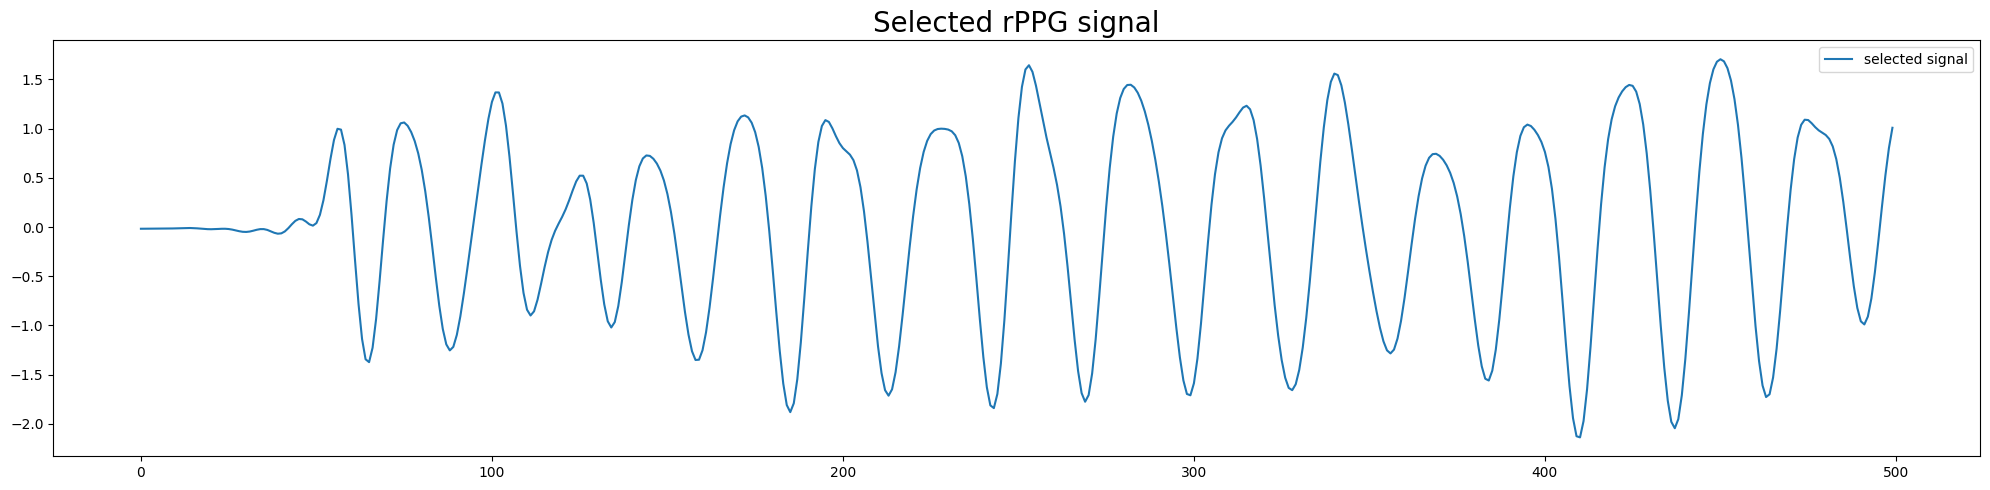

In [15]:
plt.figure(figsize=(20, 5))
plt.title(f"Selected rPPG signal",  fontsize=20)
plt.plot(rppg_sign[selected_signal][start_end_idx[0]:start_end_idx[1]], label='selected signal')
plt.legend(loc='upper right'); plt.tight_layout(); plt.show()